In [4]:
import pandas as pd
from IPython.display import display
red_wine = pd.read_csv('red-wine.csv')

df_train = red_wine.sample(frac=0.7,random_state=0)
df_valid = red_wine.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

x_train = df_train.drop('quality',axis=1)
x_valid = df_valid.drop('quality',axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

print(x_train.shape)

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512,activation='relu',input_shape=[11]),
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    x_train,y_train,
    validation_data=(x_valid,y_valid),
    batch_size=256,
    epochs=10,
)

(1119, 11)
Epoch 1/10


c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.4761 - val_loss: 0.3752
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2946 - val_loss: 0.2745
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2507 - val_loss: 0.2052
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2082 - val_loss: 0.2262
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2081 - val_loss: 0.1987
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1945 - val_loss: 0.1884
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1836 - val_loss: 0.1899
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1821 - val_loss: 0.1782
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1757 - val_loss: 0.1753
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1727 - val_loss: 0.1714


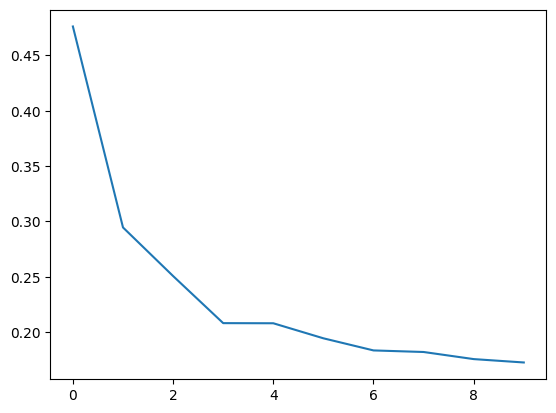

In [5]:
import pandas as pd
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();